In [1]:
import os
import tensorflow as tf
from util import constants
from util.config_util import get_model_params, get_task_params, get_train_params
from tf2_models.trainer import Trainer
from absl import app
from absl import flags
import numpy as np
from util.models import MODELS
from util.tasks import TASKS
from notebook_utils import *
from distill.repsim_util import *
import tensorflow_datasets as tfds
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()

from tqdm import tqdm

chkpt_dir='../tf_ckpts'

[nltk_data] Downloading package punkt to /home/dehghani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def get_outputs(model, x):
  outputs = model.detailed_call(x, training=tf.convert_to_tensor(True))
  logits, reps = outputs[0], outputs[model.rep_index]
  if model.rep_layer is not None and model.rep_layer is not -1:
    reps = reps[model.rep_layer]

  return reps, logits

In [3]:
def convert_examples(examples):
    pad_length = int((28 - 28) / 2)
    return tf.pad(tf.cast(examples['image'], dtype=tf.float32) / 255,
                  ([pad_length, pad_length], [pad_length, pad_length],
                   [0, 0])), tf.cast(
      examples['label'], dtype=tf.int32)

cmnist_trans = tfds.load('mnist_corrupted/translate', split='test')
cmnist_trans = cmnist_trans.map(map_func=lambda x: convert_examples(x))
cmnist_trans = cmnist_trans.batch(64)

task1 = 'mnist'
task1 = TASKS[task1](get_task_params(), data_dir='../data')
cl_token = 0

task = task1

models = []
labels = []

In [4]:
cmnist_trans = tfds.builder('mnist_corrupted/translate')
cmnist_trans_test = cmnist_trans.as_dataset(split='test')
cmnist_trans_test = cmnist_trans_test.map(map_func=lambda x: convert_examples(x))
cmnist_trans_test = cmnist_trans_test.batch(64)
cmnist_trans.info.splits['test'].num_examples / 64

156.25

In [5]:
cmnist_scale = tfds.builder('mnist_corrupted/scale')
cmnist_scale_test = cmnist_scale.as_dataset(split='test')
cmnist_scale_test = cmnist_scale_test.map(map_func=lambda x: convert_examples(x))
cmnist_scale_test = cmnist_scale_test.batch(64)
cmnist_scale.info.splits['test'].num_examples / 64

156.25

In [6]:
####test
config={'student_exp_name':'gc_o_std1',
        'teacher_exp_name':'gc_o_dtchr1',
        'task_name':'mnist',
        'teacher_model':'cl_vcnn',
        'student_model':'cl_vff',
        'teacher_config':'vcnn_mnist5',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

cnn2ff_ot1_std1, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t1, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


models.extend([cnn2ff_ot1_std1, cnn_t1])
labels.extend(['cnn2ff_ot1_std1', 'cnn_t1'])
print('student perf:')
print(cnn2ff_ot1_std1.evaluate(task.test_dataset, steps=10))
print('teacher perf:')
print(cnn_t1.evaluate(task.test_dataset, steps=10))
############################################
config={'student_exp_name':'gc_o_std2',
        'teacher_exp_name':'gc_o_dtchr2',
        'task_name':'mnist',
        'teacher_model':'cl_vcnn',
        'student_model':'cl_vff',
        'teacher_config':'vcnn_mnist6',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2ff_ot2_std2, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t2, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([cnn2ff_ot2_std2, cnn_t2])
labels.extend(['cnn2ff_ot2_std2', 'cnn_t2'])
print('student perf:')
print(cnn2ff_ot2_std2.evaluate(task.test_dataset, steps=10))
print('teacher perf:')
print(cnn_t2.evaluate(task.test_dataset, steps=10))
############################################
config={'student_exp_name':'gc_o_std3',
        'teacher_exp_name':'gc_o_dtchr3',
        'task_name':'mnist',
        'teacher_model':'cl_vcnn',
        'student_model':'cl_vff',
        'teacher_config':'vcnn_mnist7',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2ff_ot3_std3, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t3, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([cnn2ff_ot3_std3, cnn_t3])
labels.extend(['cnn2ff_ot3_std3', 'cnn_t3'])
print('student perf:')
print(cnn2ff_ot3_std3.evaluate(task.test_dataset, steps=10))
print('teacher perf:')
print(cnn_t3.evaluate(task.test_dataset, steps=10))

model config: ff_mnist4
model config: vcnn_mnist5
model config: vcnn_mnist5
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0_vcnn_mnist5_gc_o_dtchr1_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1
Restored student from ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0_vcnn_mnist5_gc_o_dtchr1_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1/ckpt-400
Restored student from ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0_vcnn_mnist5_gc_o_dtchr1/ckpt-400
student perf:
10/10 [==============================] - 1s 62ms/step - loss: 0.0329 - classification_loss: 0.0290 - sparse_categorical_accuracy: 0.9891
[0.03293270273134112, 0.029002229, 0.9890625]
teacher perf:
10/10 [==============================] - 2s 207ms/step - loss: 0.0255 - classification_loss: 0.0255 - sparse_categorical_accuracy:

In [7]:
#Random

config={'student_exp_name':'gc_o_std_r1',
        'teacher_exp_name':'gc_o_tchr_r1',
        'task_name':'mnist',
        'teacher_model':'cl_vcnn',
        'student_model':'cl_vff',
        'teacher_config':'vcnn_mnist5',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl5_4_crs_slw_3',
        'distill_mode':'offline',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff_r1, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_r1, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


##################
config['student_exp_name'] ='gc_o_std_r2'
config['teacher_exp_name'] ='gc_o_tchr_r2'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff_r2, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_r2, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

##################
config['student_exp_name'] ='gc_o_std_r3'
config['teacher_exp_name'] ='gc_o_tchr_r3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

ff_r3, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_r3, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


##################
config['student_exp_name'] ='gc_o_std_r4'
config['teacher_exp_name'] ='gc_o_tchr_r4'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

ff_r4, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_r4, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


model config: ff_mnist4
model config: vcnn_mnist5
model config: vcnn_mnist5
student_checkpoint: ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0_vcnn_mnist5_gc_o_tchr_r1_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std_r1
No checkpoint found ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0_vcnn_mnist5_gc_o_tchr_r1_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std_r1
No checkpoint found ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0_vcnn_mnist5_gc_o_tchr_r1
model config: ff_mnist4
model config: vcnn_mnist5
model config: vcnn_mnist5
student_checkpoint: ../tf_ckpts/mnist/offline_pure_dstl5_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0_vcnn_mnist5_gc_o_tchr_r2_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std_r2
No checkpoint found ../tf_ckpts/mnist/offline_pure

In [8]:
## CNN -> FF
###############################1
config={'student_exp_name':'gc_o_std10',
        'teacher_exp_name':'gc_o_dtchr10',
        'task_name':'mnist',
        'teacher_model':'cl_vcnn',
        'student_model':'cl_vff',
        'teacher_config':'vcnn_mnist7',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2ff_ot10_std10, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t10, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([cnn_t10, cnn2ff_ot10_std10])
labels.extend(['cnn_t10', 'cnn2ff_ot10_std10'])
#**********offline
config['student_exp_name'] ='gc_f_std10'
config['teacher_exp_name'] ='gc_o_dtchr10'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2ff_ft10_std10, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t10, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([cnn_t10, cnn2ff_ft10_std10])
# labels.extend(['cnn_t10', 'cnn2ff_ft1_std10'])
###############################2
config['student_exp_name'] ='gc_o_std11'
config['teacher_exp_name'] ='gc_o_dtchr11'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2ff_ot11_std11, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t11, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([cnn_t11, cnn2ff_ot11_std11])
labels.extend(['cnn_t11', 'cnn2ff_ot11_std11'])
#**********offline
config['student_exp_name'] ='gc_f_std11'
config['teacher_exp_name'] ='gc_o_dtchr11'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2ff_ft11_std11, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t11, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

# models.extend([cnn_t11, cnn2ff_ft11_std11])
# labels.extend(['cnn_t11', 'cnn2ff_ft11_std11'])
###############################3
config['student_exp_name'] ='gc_o_std12'
config['teacher_exp_name'] ='gc_o_dtchr12'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2ff_ot12_std12, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t12, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([cnn_t12, cnn2ff_ot12_std12])
labels.extend(['cnn_t12', 'cnn2ff_ot12_std12'])
#**********offline
config['student_exp_name'] ='gc_f_std12'
config['teacher_exp_name'] ='gc_o_dtchr12'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2ff_ft12_std12, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t12, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

# models.extend([cnn_t12, cnn2ff_ft12_std12])
# labels.extend(['cnn_t12', 'cnn2ff_ft12_std12'])
###############################4
config['student_exp_name'] ='gc_o_std13'
config['teacher_exp_name'] ='gc_o_dtchr13'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2ff_ot13_std13, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t13, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([cnn_t13, cnn2ff_ot13_std13])
labels.extend(['cnn_t13', 'cnn2ff_ot13_std13'])
#**********offline
config['student_exp_name'] ='gc_f_std13'
config['teacher_exp_name'] ='gc_o_dtchr13'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2ff_ft13_std13, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t13, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([cnn_t13, cnn2ff_ft13_std13])
# labels.extend(['cnn_t13', 'cnn2ff_ft13_std13'])

model config: ff_mnist4
model config: vcnn_mnist7
model config: vcnn_mnist7
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr10_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std10
Restored student from ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr10_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std10/ckpt-400
Restored student from ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr10/ckpt-400
model config: ff_mnist4
model config: vcnn_mnist7
model config: vcnn_mnist7
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr11_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std11
Restored student from ../tf_ckpts/

In [9]:
#CNN -> CNN
###############################1
config={'student_exp_name':'gc_o_std18',
        'teacher_exp_name':'gc_o_tchr18',
        'task_name':'mnist',
        'teacher_model':'cl_vcnn',
        'student_model':'cl_vcnn',
        'teacher_config':'vcnn_mnist7',
        'student_config':'vcnn_mnist7',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2cnn_ot18_std18, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t18, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([cnn_t18, cnn2cnn_ot18_std18])
labels.extend(['cnn_t18', 'cnn2cnn_ft18_std18'])

#**********offline
config['student_exp_name'] ='gc_f_std18'
config['teacher_exp_name'] ='gc_o_tchr18'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'

# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2cnn_ft18_std18, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t18, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([cnn_t18, cnn2cnn_ft18_std18])
# labels.extend(['cnn_t18', 'cnn2cnn_ft18_std18'])
###############################2
config['student_exp_name'] ='gc_o_std17'
config['teacher_exp_name'] ='gc_o_tchr17'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2cnn_ot17_std17, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t17, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([cnn_t17, cnn2cnn_ot17_std17])
labels.extend(['cnn_t17', 'cnn2cnn_ft17_std17'])
#**********offline
config['student_exp_name'] ='gc_f_std17'
config['teacher_exp_name'] ='gc_o_tchr17'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2cnn_ft17_std17, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t17, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([cnn_t17, cnn2cnn_ft17_std17])
# labels.extend(['cnn_t17', 'cnn2cnn_ft17_std17'])

###############################3
config['student_exp_name'] ='gc_o_std16'
config['teacher_exp_name'] ='gc_o_tchr16'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2cnn_ot16_std16, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t16, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

models.extend([cnn_t16, cnn2cnn_ot16_std16])
labels.extend(['cnn_t16', 'cnn2cnn_ft16_std16'])
#**********offline
config['student_exp_name'] ='gc_f_std16'
config['teacher_exp_name'] ='gc_o_tchr16'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

# cnn2cnn_ft16_std16, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t16, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([cnn_t16, cnn2cnn_ft16_std16])
# labels.extend(['cnn_t16', 'cnn2cnn_ft16_std16'])
###############################4
config['student_exp_name'] ='gc_o_std15'
config['teacher_exp_name'] ='gc_o_tchr15'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


cnn2cnn_ot15_std15, _ = get_student_model(config, task, std_hparams, cl_token)
cnn_t15, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([cnn_t15, cnn2cnn_ot15_std15])
labels.extend(['cnn_t15', 'cnn2cnn_ot15_std15'])

#**********offline
config['student_exp_name'] ='gc_f_std15'
config['teacher_exp_name'] ='gc_o_tchr15'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# cnn2cnn_ft15_std15, _ = get_student_model(config, task, std_hparams, cl_token)
# cnn_t15, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([cnn_t15, cnn2cnn_ft15_std15])
# labels.extend(['cnn_t15', 'cnn2cnn_ft15_std15'])

model config: vcnn_mnist7
model config: vcnn_mnist7
model config: vcnn_mnist7
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_tchr18_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_std18
Restored student from ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_tchr18_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_std18/ckpt-11
Restored student from ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_tchr18/ckpt-11
model config: vcnn_mnist7
model config: vcnn_mnist7
model config: vcnn_mnist7
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_tchr17_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_std17
Restored stu

In [10]:
#FF -> CNN
###############################1
config={'student_exp_name':'gc_o_std100',
        'teacher_exp_name':'gc_o_dtchr100',
        'task_name':'mnist',
        'teacher_model':'cl_vff',
        'student_model':'cl_vcnn',
        'teacher_config':'ff_mnist4',
        'student_config':'vcnn_mnist7',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2cnn_ot100_std100, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t100, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([ff_t100, ff2cnn_ot100_std100])
labels.extend(['ff_t100', 'ff2cnn_ot100_std100'])
#**********offline
config['student_exp_name'] ='gc_f_std100'
config['teacher_exp_name'] ='gc_o_dtchr100'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'

# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2cnn_ft100_std100, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t100, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([ff_t100, ff2cnn_ft100_std100])
# labels.extend(['ff_t100', 'ff2cnn_ft100_std100'])
###############################2
config['student_exp_name'] ='gc_o_std101'
config['teacher_exp_name'] ='gc_o_tchr101'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

ff2cnn_ot101_std101, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t101, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([ff_t101, ff2cnn_ot101_std101])
labels.extend(['ff_t101', 'ff2cnn_ot101_std101'])


#**********offline
config['student_exp_name'] ='gc_f_std101'
config['teacher_exp_name'] ='gc_o_tchr101'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2cnn_ft101_std101, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t101, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([ff_t101, ff2cnn_ft101_std101])
# labels.extend(['ff_t101', 'ff2cnn_ft101_std101'])

###############################3
config['student_exp_name'] ='gc_o_std102'
config['teacher_exp_name'] ='gc_o_tchr102'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2cnn_ot102_std102, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t102, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([ff_t102, ff2cnn_ot102_std102])
labels.extend(['ff_t102', 'ff2cnn_ot102_std102'])

#**********offline
config['student_exp_name'] ='gc_f_std102'
config['teacher_exp_name'] ='gc_o_tchr102'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

# ff2cnn_ft102_std102, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t102, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([ff_t102, ff2cnn_ft102_std102])
# labels.extend(['ff_t102', 'ff2cnn_ft102_std102'])
###############################4
config['student_exp_name'] ='gc_o_std103'
config['teacher_exp_name'] ='gc_o_tchr103'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2cnn_ot103_std103, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t103, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([ff_t103, ff2cnn_ot103_std103])
labels.extend(['ff_t103', 'ff2cnn_ot103_std103'])
#**********offline
config['student_exp_name'] ='gc_f_std103'
config['teacher_exp_name'] ='gc_o_tchr103'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2cnn_ft103_std103, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t103, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
# models.extend([ff_t103, ff2cnn_ft103_std103])
# labels.extend(['ff_t103', 'ff2cnn_ft103_std103'])

model config: vcnn_mnist7
model config: ff_mnist4
model config: ff_mnist4
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr100_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_std100
Restored student from ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr100_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_std100/ckpt-11
Restored student from ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr100/ckpt-11
model config: vcnn_mnist7
model config: ff_mnist4
model config: ff_mnist4
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr101_student_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_std101
Restored student from ../tf_ckpts/mnist/on

In [11]:
##ff -> ff
###############################1
config={'student_exp_name':'gc_o_std210',
        'teacher_exp_name':'gc_o_dtchr210',
        'task_name':'mnist',
        'teacher_model':'cl_vff',
        'student_model':'cl_vff',
        'teacher_config':'ff_mnist4',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2ff_ot1_std1, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t1, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


models.extend([ff2ff_ot1_std1, ff_t1])
labels.extend(['ff2ffot1_std1', 'ff_t1'])

#**********offline
config['student_exp_name'] ='gc_f_std210'
config['teacher_exp_name'] ='gc_o_dtchr210'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2ff_ft1_std1, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t1, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

# models.extend([ff2ff_ft1_std1, ff_t1])
# labels.extend(['ff2ff_ft1_std1', 'ff_t1'])
# print('student perf:')
# print(ff2ff_ft1_std1.evaluate(task.test_dataset, steps=10))
# print('teacher perf:')
# print(ff_t1.evaluate(task.test_dataset, steps=10))
###############################2
config['student_exp_name'] ='gc_o_std211'
config['teacher_exp_name'] ='gc_o_dtchr211'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2ff_ot2_std2, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t2, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


models.extend([ff2ff_ot2_std2, ff_t2])
labels.extend(['ff2ff_ot2_std2', 'ff_t2'])
#**********offline
config['student_exp_name'] ='gc_f_std211'
config['teacher_exp_name'] ='gc_o_dtchr211'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2ff_ft2_std2, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t2, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

# models.extend([ff2ff_ft2_std2, ff_t2])
# labels.extend(['ff2ff_ft2_std2', 'ff_t2'])
# print('student perf:')
# print(ff2ff_ft2_std2.evaluate(task.test_dataset, steps=10))
# print('teacher perf:')
# print(ff_t2.evaluate(task.test_dataset, steps=10))
###############################3
config['student_exp_name'] ='gc_o_std212'
config['teacher_exp_name'] ='gc_o_dtchr212'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2ff_ot3_std3, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t3, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


models.extend([ff2ff_ot3_std3, ff_t3])
labels.extend(['ff2ff_ot3_std3', 'ff_t3'])


#**********offline
config['student_exp_name'] ='gc_f_std212'
config['teacher_exp_name'] ='gc_o_dtchr212'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2ff_ft3_std3, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t3, _ = get_teacher_model(config, task, tchr_hparams, cl_token)

# models.extend([ff2ff_ft3_std3, ff_t3])
# labels.extend(['ff2ff_ft3_std3', 'ff_t3'])
# print('student perf:')
# print(ff2ff_ft3_std3.evaluate(task.test_dataset, steps=10))
# print('teacher perf:')
# print(ff_t3.evaluate(task.test_dataset, steps=10))
###############################4
config['student_exp_name'] ='gc_o_std202'
config['teacher_exp_name'] ='gc_o_tchr202'
config['distill_mode'] ='online'
config['distill_config'] ='pure_dstl2_4_crs_slw_3'
std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


ff2ff_ot4_std4, _ = get_student_model(config, task, std_hparams, cl_token)
ff_t4, _ = get_teacher_model(config, task, tchr_hparams, cl_token)
models.extend([ff2ff_ot4_std4, ff_t4])
labels.extend(['ff2ff_ot4_std4', 'ff_t4'])


#**********offline
config['student_exp_name'] ='gc_f_std220'
config['teacher_exp_name'] ='gc_o_dtchr210'
config['distill_mode'] ='offline'
config['distill_config'] ='pure_dstl5_4_crs_slw_3'
# std_hparams=get_model_params(task, config['student_model'], config['student_config'])
# tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])


# ff2ff_ft4_std4, _ = get_student_model(config, task, std_hparams, cl_token)
# ff_t4, _ = get_teacher_model(config, task, tchr_hparams, cl_token)


# models.extend([ff2ff_ft4_std4, ff_t4])
# labels.extend(['ff2ff_ft4_std4', 'ff_t4'])
# print('student perf:')
# print(ff2ff_ft4_std4.evaluate(task.test_dataset, steps=10))
# print('teacher perf:')
# print(ff_t4.evaluate(task.test_dataset, steps=10))

model config: ff_mnist4
model config: ff_mnist4
model config: ff_mnist4
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr210_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std210
Restored student from ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr210_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std210/ckpt-400
Restored student from ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr210/ckpt-400
model config: ff_mnist4
model config: ff_mnist4
model config: ff_mnist4
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_dtchr211_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std211
Restored student from ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw

In [12]:
# models = [#std_ff_r0, std_ff_r1, std_ff_r2, 
#           #std_ff4, 
#          #std_f4_ff1, std_f5_ff1, std_f6_ff1,
#          std_f100_ff1, std_f110_ff1, std_f101_ff1, std_f111_ff1, std_f102_ff1, std_f112_ff1,
#          std_f100_ff2,
#          std_f210_ff1, std_f211_ff1, std_f212_ff1,
#          std_f210_ff2, std_f211_ff2, std_f212_ff2,
#          #tchr_rsnt_r0, tchr_rsnt_r1, tchr_rsnt_r2, 
#          # tchr_rsnt4, 
#          tchr_ff210, tchr_ff211, tchr_ff212,
#          tchr_rsnt100, tchr_rsnt110, tchr_rsnt101,  tchr_rsnt111, tchr_rsnt102, tchr_rsnt112
#          #tchr_rsnt3
#         ]
# labels = [#'std_ff_r0', 'std_ff_r1', 'std_ff_r2', 
#           #'std_ff4', 
#           #'std_f4_ff1', 'std_f5_ff1', 'std_f6_ff1',
#           'std_f100_ff1', 'std_f110_ff1', 'std_f101_ff1', 'std_f111_ff1', 'std_f102_ff1', 'std_f112_ff1',
#          'std_f100_ff2',
#          'std_f210_ff1', 'std_f211_ff1', 'std_f212_ff1',
#          'std_f210_ff2', 'std_f211_ff2', 'std_f212_ff2', 
#           #'tchr_ff_r0', 'tchr_rsnt_r1', 'tchr_rsnt_r2', 
#           #'tchr_rsnt4', 
#           'tchr_ff210', 'tchr_ff211', 'tchr_ff212',
#          'tchr_rsnt100', 'tchr_rsnt110', 'tchr_rsnt101',  'tchr_rsnt111', 'tchr_rsnt102', 'tchr_rsnt112'
#           #'tchr_rsnt3'
#          ]

for x, y in task.valid_dataset:
    for model in models:
        print(model.model_name)
        model(x)
    break

cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
cl_vcnn_hc-128.64.64_h

In [13]:

def  get_reploss_dic(models, labels, data, repindex=1):    
    reploss_dic = {}
    for l1 in labels:
        reploss_dic[l1] = {}
        for l2 in labels:
            reploss_dic[l1][l2] = []

    num_batches = 0
    for x, y in data:
        reps = []
        for m in models:
            outputs = get_outputs(m, x)
            reps.append(outputs[repindex])
        for i in np.arange(len(labels)):
            for j in np.arange(i, len(labels)):
                reploss = rep_loss(reps1=reps[i], reps2=reps[j],
                                     padding_symbol=None,
                                     inputs=x)
                reploss_dic[labels[i]][labels[j]].append(reploss)
                if i != j:
                    reploss_dic[labels[j]][labels[i]].append(reploss)
        num_batches += 1

        if num_batches > 20:
            break
            
    dist_lists = {}
    for l1 in reploss_dic.keys():
        dist_lists[l1] = []
        for i in  np.arange(len(reploss_dic[l1].keys())):
            l2 = list(reploss_dic[l1].keys())[i]
            dist_lists[l1].append(np.mean(reploss_dic[l1][l2]))
            
    return reploss_dic, dist_lists

In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

def project2d(reploss_dic, dist_lists):
    dists = []
    cities = []
    for i in np.arange(len(dist_lists.keys())):
        k = list(dist_lists.keys())[i]
        cities.append(k)
        dists.append(list(map(float , dist_lists[k])))

    adist = np.array(dists)
    amax = np.amax(adist)
    adist /= amax

    mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=12345)
    results = mds.fit(adist)

    coords = results.embedding_

    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(
        coords[:, 0], coords[:, 1], marker = 'o'
        )
    for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
        plt.annotate(
            label,
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    plt.show()
    
    return results.embedding_, cities

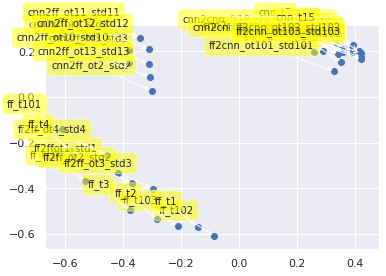

In [15]:
reploss_dic, dist_lists = get_reploss_dic(models, labels, cmnist_trans_test, repindex=1)
trans_Ez, trans_Lz = project2d(reploss_dic, dist_lists)

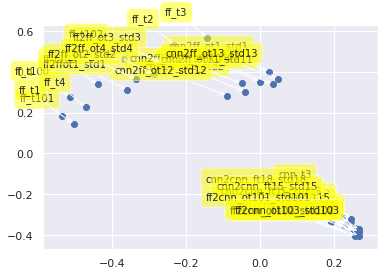

In [16]:
reploss_dic, dist_lists = get_reploss_dic(models, labels, cmnist_scale_test, repindex=1)
scale_Ez, scale_Lz = project2d(reploss_dic, dist_lists)

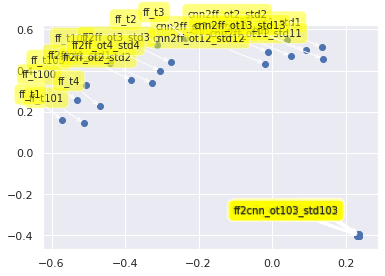

(array([[ 0.13453038,  0.51393777],
        [ 0.23650675, -0.40023004],
        [ 0.04091676,  0.55048125],
        [ 0.23696862, -0.39366366],
        [ 0.0503796 ,  0.47179114],
        [ 0.23769829, -0.39962519],
        [ 0.23231052, -0.40335081],
        [-0.01202238,  0.49213608],
        [ 0.23498475, -0.39740868],
        [ 0.13765799,  0.4583932 ],
        [ 0.23461376, -0.40177675],
        [-0.01931404,  0.43352314],
        [ 0.23705044, -0.40200535],
        [ 0.0909897 ,  0.49826063],
        [ 0.23210638, -0.39470953],
        [ 0.23220441, -0.39667454],
        [ 0.23652914, -0.39604063],
        [ 0.23378043, -0.39884831],
        [ 0.23120862, -0.39994068],
        [ 0.23346019, -0.39391487],
        [ 0.23433634, -0.40354802],
        [ 0.23146007, -0.39568573],
        [-0.53145499,  0.25715003],
        [ 0.23116393, -0.40223881],
        [-0.51280361,  0.14529928],
        [ 0.23299862, -0.40180458],
        [-0.44137812,  0.43550588],
        [ 0.23529507, -0.404

In [17]:
reploss_dic, dist_lists = get_reploss_dic(models, labels, cmnist_trans_test, repindex=0)
project2d(reploss_dic, dist_lists)

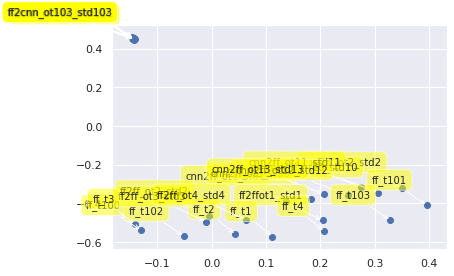

(array([[ 0.13628347, -0.38979043],
        [-0.14428203,  0.45464686],
        [ 0.35057685, -0.3193285 ],
        [-0.14370268,  0.45013003],
        [ 0.18240431, -0.37727679],
        [-0.14248846,  0.44870948],
        [-0.14318527,  0.45341869],
        [ 0.30719322, -0.34516967],
        [-0.14331837,  0.45263639],
        [ 0.27476388, -0.31557336],
        [-0.142379  ,  0.45220702],
        [ 0.25105915, -0.35819494],
        [-0.1446271 ,  0.45612321],
        [ 0.20699314, -0.35261517],
        [-0.14356377,  0.44899881],
        [-0.14195163,  0.45013911],
        [-0.14428673,  0.45248094],
        [-0.14289418,  0.45041339],
        [-0.14383021,  0.45160377],
        [-0.14158704,  0.44824373],
        [-0.1448075 ,  0.45149899],
        [-0.14202147,  0.44789622],
        [-0.12978187, -0.54095821],
        [-0.14518549,  0.45447619],
        [ 0.39646862, -0.41060469],
        [-0.14527532,  0.45618702],
        [-0.05066243, -0.57101787],
        [-0.14555587,  0.457

In [18]:
reploss_dic, dist_lists = get_reploss_dic(models, labels, cmnist_scale_test, repindex=0)
project2d(reploss_dic, dist_lists)

In [19]:
for model,label in zip(models,labels):
    print(label)
    results = model.evaluate(cmnist_trans_test, steps=cmnist_trans.info.splits['test'].num_examples / 64)
    print(results)

cnn2ff_ot1_std1
157/156 [==============================] - 1s 5ms/step - loss: 1.8223 - classification_loss: 1.8183 - sparse_categorical_accuracy: 0.5842
[1.8310223620414734, 1.818345, 0.5842]
cnn_t1
157/156 [==============================] - 1s 4ms/step - loss: 0.0624 - classification_loss: 0.0624 - sparse_categorical_accuracy: 0.9812
[0.06266056790286675, 0.06236028, 0.9812]
cnn2ff_ot2_std2
157/156 [==============================] - 0s 3ms/step - loss: 1.7824 - classification_loss: 1.7783 - sparse_categorical_accuracy: 0.5862
[1.7909297454833983, 1.7783391, 0.5862]
cnn_t2
157/156 [==============================] - 1s 4ms/step - loss: 0.0783 - classification_loss: 0.0783 - sparse_categorical_accuracy: 0.9762
[0.07868901128033176, 0.078312166, 0.9762]
cnn2ff_ot3_std3
157/156 [==============================] - 0s 3ms/step - loss: 1.7118 - classification_loss: 1.7078 - sparse_categorical_accuracy: 0.6011
[1.7200112071990967, 1.7078134, 0.6011]
cnn_t3
157/156 [============================

In [20]:
for model,label in zip(models,labels):
    print(label)
    results = model.evaluate(cmnist_scale_test, steps=cmnist_scale.info.splits['test'].num_examples / 64)
    print(results)

cnn2ff_ot1_std1
157/156 [==============================] - 0s 3ms/step - loss: 0.2258 - classification_loss: 0.2219 - sparse_categorical_accuracy: 0.9350
[0.2268748954385519, 0.22186068, 0.935]
cnn_t1
157/156 [==============================] - 1s 4ms/step - loss: 0.1439 - classification_loss: 0.1439 - sparse_categorical_accuracy: 0.9551
[0.14456648395955563, 0.14387488, 0.9551]
cnn2ff_ot2_std2
157/156 [==============================] - 0s 3ms/step - loss: 0.1984 - classification_loss: 0.1944 - sparse_categorical_accuracy: 0.9379
[0.19934586118459702, 0.19435818, 0.9379]
cnn_t2
157/156 [==============================] - 1s 4ms/step - loss: 0.1976 - classification_loss: 0.1976 - sparse_categorical_accuracy: 0.9387
[0.19852923684120177, 0.19757992, 0.9387]
cnn2ff_ot3_std3
157/156 [==============================] - 0s 3ms/step - loss: 0.2437 - classification_loss: 0.2398 - sparse_categorical_accuracy: 0.9255
[0.2449085025370121, 0.239757, 0.9255]
cnn_t3
157/156 [===========================

In [21]:
for model,label in zip(models,labels):
    print(label)
    results = model.evaluate(task.test_dataset, steps=task.n_test_batches)
    print(results)

cnn2ff_ot1_std1
156/156 [==============================] - 0s 3ms/step - loss: 0.0342 - classification_loss: 0.0303 - sparse_categorical_accuracy: 0.9916
[0.03423632049145034, 0.03030585, 0.99158657]
cnn_t1
156/156 [==============================] - 1s 4ms/step - loss: 0.0291 - classification_loss: 0.0291 - sparse_categorical_accuracy: 0.9909
[0.029148857634983216, 0.029147893, 0.99088544]
cnn2ff_ot2_std2
156/156 [==============================] - 0s 3ms/step - loss: 0.0388 - classification_loss: 0.0347 - sparse_categorical_accuracy: 0.9906
[0.03876860650518957, 0.03473326, 0.9905849]
cnn_t2
156/156 [==============================] - 1s 4ms/step - loss: 0.0317 - classification_loss: 0.0317 - sparse_categorical_accuracy: 0.9908
[0.0317221551404845, 0.03172121, 0.99078524]
cnn2ff_ot3_std3
156/156 [==============================] - 0s 3ms/step - loss: 0.0346 - classification_loss: 0.0307 - sparse_categorical_accuracy: 0.9916
[0.034637083794969395, 0.03065558, 0.99158657]
cnn_t3
156/156 [=

In [22]:
import tensorflow_probability as tfp

for model,label in zip(models,labels):
    print(label)
    print(model.model_name)

    model_accuracy, predicted_class_probs, correct_class_probs, model_logits, model_trues= test_for_calibration(model, task, n_bins=20)

    #print(len(model_accuracy))
    #print(len(predicted_class_probs))
    ##plot_calibration(model_accuracy, predicted_class_probs, correct_class_probs, n_bins=20)
    plt.show()
    model_ece = tfp.stats.expected_calibration_error(
        1000000,
        logits=model_logits,
        labels_true=model_trues,
    )
    print(model_ece.numpy())
    
    print("#######################")

cnn2ff_ot1_std1
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
Instructions for updating:
`tf.batch_gather` is deprecated, please use `tf.gather` with `batch_dims=-1` instead.


Instructions for updating:
`tf.batch_gather` is deprecated, please use `tf.gather` with `batch_dims=-1` instead.


0.009497315
#######################
cnn_t1
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0
0.011150749
#######################
cnn2ff_ot2_std2
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
0.010649212
#######################
cnn_t2
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.2_indrop-0.0
0.012752014
#######################
cnn2ff_ot3_std3
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
0.010581383
#######################
cnn_t3
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
0.011820446
#######################
cnn_t10
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
0.0113352705
#######################
cnn2ff_ot10_std10
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
0.010445473
#######################
cnn_t11
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
0.011476545
#######################
cnn2ff_ot11_std11
cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0
0.010873727
#######################
cnn_t12
cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0
0.010941881
#######################
cnn2

In [27]:
for c,l in zip(trans_Ez,trans_Lz):
    print(l.split('_')[0],'\t',l, '\t',c[0], '\t',c[1])

cnn2ff 	 cnn2ff_ot1_std1 	 -0.37898107536761466 	 0.20791867430207
cnn 	 cnn_t1 	 0.3921199879783036 	 0.19989671617949636
cnn2ff 	 cnn2ff_ot2_std2 	 -0.3007980203124154 	 0.028696148091977822
cnn 	 cnn_t2 	 0.35052172591281966 	 0.15170425187116154
cnn2ff 	 cnn2ff_ot3_std3 	 -0.31091664558730514 	 0.14489744428362833
cnn 	 cnn_t3 	 0.2529256679129604 	 0.2576559063912307
cnn 	 cnn_t10 	 0.34300211396640296 	 0.22637362523476395
cnn2ff 	 cnn2ff_ot10_std10 	 -0.3782658489547773 	 0.14942919585737993
cnn 	 cnn_t11 	 0.3927071778643663 	 0.228526082054516
cnn2ff 	 cnn2ff_ot11_std11 	 -0.34123584263709833 	 0.2591534371296547
cnn 	 cnn_t12 	 0.3884995734431732 	 0.21635975269789645
cnn2ff 	 cnn2ff_ot12_std12 	 -0.30981858899900094 	 0.20962030654089023
cnn 	 cnn_t13 	 0.3588317511798633 	 0.19945007385647684
cnn2ff 	 cnn2ff_ot13_std13 	 -0.30786710492874747 	 0.08927550735788849
cnn 	 cnn_t18 	 0.41444444568046646 	 0.20052838996368108
cnn2cnn 	 cnn2cnn_ft18_std18 	 0.22459870810422103 	 0

In [130]:
config={'student_exp_name':'gc_o_std300',
        'teacher_exp_name':'gc_o_tchr300',
        'task_name':'mnist',
        'teacher_model':'cl_vff',
        'student_model':'cl_vff',
        'teacher_config':'ff_mnist4',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

teacher_model = MODELS[config['teacher_model']](hparams=tchr_hparams, cl_token=cl_token)

   
ckpt_dir = os.path.join(config['chkpt_dir'], task.name,
                              '_'.join([teacher_model.model_name, config['teacher_config'],config['teacher_exp_name']]))
tchr_ckpt = tf.train.Checkpoint(net=teacher_model)
teacher_manager = tf.train.CheckpointManager(tchr_ckpt, ckpt_dir, max_to_keep=None)
teacher_manager.latest_checkpoint

student_model = MODELS[config['student_model']](hparams=std_hparams, cl_token=cl_token)
ckpt_dir = os.path.join(config['chkpt_dir'], task.name,
                          '_'.join([config['distill_mode'],config['distill_config'],
                                    "teacher", teacher_model.model_name, 
                                    config['teacher_config'],
                                    config['teacher_exp_name'],
                                   "student",student_model.model_name,
                                    str(config['student_config']),
                                    config['student_exp_name']]))
print("student_checkpoint:", ckpt_dir)
std_ckpt = tf.train.Checkpoint(net=student_model)
student_manager = tf.train.CheckpointManager(std_ckpt, ckpt_dir, max_to_keep=None)


model config: ff_mnist4
model config: ff_mnist4
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std300


In [108]:
print(student_manager.latest_checkpoint)
for ck in student_manager.checkpoints:
    std_ckpt.restore(ck)
    #print("#######", ck, "########")
    student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    trans = student_model.evaluate(cmnist_trans_test, steps=cmnist_trans.info.splits['test'].num_examples / 64, verbose=3)
    scale = student_model.evaluate(cmnist_scale_test, steps=cmnist_scale.info.splits['test'].num_examples / 64, verbose=3)
    mnist = student_model.evaluate(task.test_dataset, steps=task.n_test_batches, verbose=3)
    print(trans[-1], scale[-1], mnist[-1])

../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std300/ckpt-11
0.1104 0.2955 0.81901044
0.1167 0.3625 0.9001402
0.1275 0.4152 0.92247593
0.1511 0.4678 0.94711536
0.1977 0.5623 0.96965146
0.2829 0.6715 0.9802684
0.359 0.7667 0.98347354
0.3745 0.764 0.98427486
0.3933 0.8123 0.9853766
0.3875 0.8526 0.98748
0.4004 0.863 0.9883814


../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std300/ckpt-11
####### ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300/ckpt-1 ######## 0
####### ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300/ckpt-2 ######## 1
####### ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300/ckpt-3 ######## 2
####### ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300/ckpt-4 ######## 3
####### ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300/ckpt-5 ######## 4
####### ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300/ckpt-6 ######## 5
####### ../tf_ckpts/mnist/cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300/ckpt-7 ######## 6
####### .

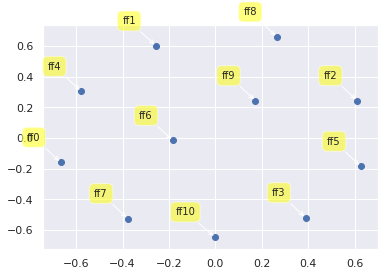

(array([[-0.66682882, -0.15844263],
        [-0.25629896,  0.5990251 ],
        [ 0.61080121,  0.24338462],
        [ 0.38874507, -0.51860475],
        [-0.57853172,  0.30361242],
        [ 0.62633522, -0.18446405],
        [-0.18345324, -0.01618391],
        [-0.37735403, -0.52423414],
        [ 0.2650927 ,  0.6577319 ],
        [ 0.17222904,  0.24266524],
        [-0.00073647, -0.6444898 ]]),
 ['ff0',
  'ff1',
  'ff2',
  'ff3',
  'ff4',
  'ff5',
  'ff6',
  'ff7',
  'ff8',
  'ff9',
  'ff10'])

In [131]:
import logging
tf.get_logger().setLevel(logging.ERROR)

from copy import deepcopy, copy
print(student_manager.latest_checkpoint)
Mz = []
Lz = []
# for i, ck in enumerate(student_manager.checkpoints):
#     std_ckpt.restore(ck)
#     print("#######", ck, "########", i)
#     student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
#     Mz.append(copy(student_model))
#     Lz.append('ff2ff'+str(i))
    
    
    
for i, ck in enumerate(teacher_manager.checkpoints):
    tchr_ckpt.restore(ck)
    print("#######", ck, "########", i)
    teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(copy(teacher_model))
    Lz.append('ff'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, cmnist_trans_test, repindex=1)
project2d(reploss_dic, dist_lists)

../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std300/ckpt-11
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std300/ckpt-1 ######## 0
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std300/ckpt-2 ######## 1
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std300/ckpt-3 ######## 2
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4

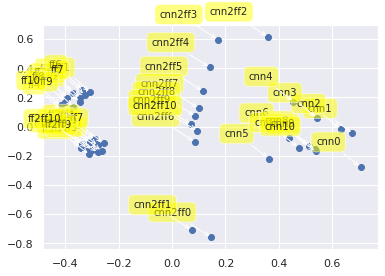

(array([[ 0.14643605, -0.75795452],
        [ 0.07313022, -0.70815756],
        [ 0.35948685,  0.61536595],
        [ 0.17170373,  0.59695769],
        [ 0.14119759,  0.40554984],
        [ 0.11595886,  0.24198192],
        [ 0.08486263, -0.10443619],
        [ 0.09987089,  0.12516452],
        [ 0.0873827 ,  0.07100988],
        [ 0.07160903,  0.0143643 ],
        [ 0.09463872, -0.02835985],
        [ 0.70642716, -0.27661225],
        [ 0.67596314, -0.04725931],
        [ 0.63252384, -0.01374973],
        [ 0.54345628,  0.06184961],
        [ 0.45492069,  0.17183634],
        [ 0.36287198, -0.21987665],
        [ 0.43709913, -0.07823778],
        [ 0.47455652, -0.14358993],
        [ 0.51311137, -0.13260085],
        [ 0.53474689, -0.15224393],
        [ 0.53877595, -0.16888455],
        [-0.34195081, -0.14477472],
        [-0.30789497, -0.10773547],
        [-0.26458372, -0.16603991],
        [-0.31095549, -0.18861472],
        [-0.28967886, -0.08683128],
        [-0.27916984, -0.177

In [125]:
import logging
tf.get_logger().setLevel(logging.ERROR)

from copy import deepcopy, copy
print(student_manager.latest_checkpoint)
# Mz = []
# Lz = []
for i, ck in enumerate(student_manager.checkpoints):
    std_ckpt.restore(ck)
    print("#######", ck, "########", i)
    student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(copy(student_model))
    Lz.append('ff2ff'+str(i))
    
    
    
for i, ck in enumerate(teacher_manager.checkpoints):
    tchr_ckpt.restore(ck)
    print("#######", ck, "########", i)
    teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(copy(teacher_model))
    Lz.append('ff'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, cmnist_trans_test, repindex=1)
project2d(reploss_dic, dist_lists)

../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_tchr300_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std300/ckpt-11


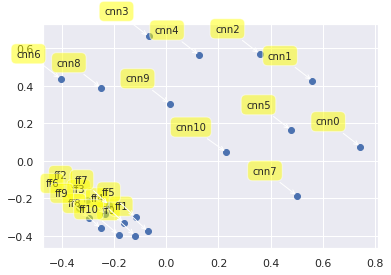

(array([[ 0.74369648,  0.07516568],
        [ 0.5596981 ,  0.42699561],
        [ 0.35780934,  0.57067455],
        [-0.06712045,  0.66329873],
        [ 0.12642344,  0.56326198],
        [ 0.47694614,  0.16499721],
        [-0.40394954,  0.43697226],
        [ 0.50170274, -0.18677051],
        [-0.24936939,  0.38954693],
        [ 0.01362748,  0.30451359],
        [ 0.22986835,  0.04616094],
        [-0.11906404, -0.39920761],
        [-0.07015524, -0.37612322],
        [-0.30207626, -0.21197733],
        [-0.23301574, -0.28648669],
        [-0.16228105, -0.33074004],
        [-0.11768268, -0.30027667],
        [-0.33449782, -0.25386774],
        [-0.22053034, -0.23456122],
        [-0.2502943 , -0.36078667],
        [-0.29729621, -0.30674463],
        [-0.182439  , -0.39404516]]),
 ['cnn0',
  'cnn1',
  'cnn2',
  'cnn3',
  'cnn4',
  'cnn5',
  'cnn6',
  'cnn7',
  'cnn8',
  'cnn9',
  'cnn10',
  'ff0',
  'ff1',
  'ff2',
  'ff3',
  'ff4',
  'ff5',
  'ff6',
  'ff7',
  'ff8',
  'ff9',
  'ff

In [99]:
import logging
tf.get_logger().setLevel(logging.ERROR)

from copy import deepcopy, copy
print(student_manager.latest_checkpoint)
# Mz = []
# Lz = []
# for i, ck in enumerate(student_manager.checkpoints):
#     std_ckpt.restore(ck)
#     print("#######", ck, "########", i)
#     student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
#     Mz.append(copy(student_model))
#     Lz.append('ff2ff'+str(i))
    
    
    
# for i, ck in enumerate(teacher_manager.checkpoints):
#     tchr_ckpt.restore(ck)
#     print("#######", ck, "########", i)
#     teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
#     Mz.append(copy(teacher_model))
#     Lz.append('ff'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, cmnist_trans_test, repindex=1)
project2d(reploss_dic, dist_lists)

../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1000/ckpt-11
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1000/ckpt-1 ######## 0
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1000/ckpt-2 ######## 1
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1000/ckpt-3 ######## 2
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc

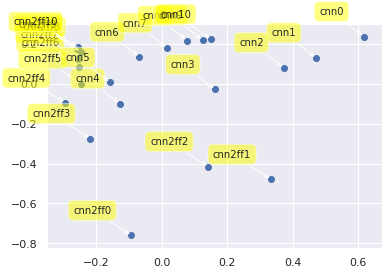

(array([[-9.28558744e-02, -7.60250818e-01],
        [ 3.34688319e-01, -4.79042955e-01],
        [ 1.42337300e-01, -4.15412779e-01],
        [-2.18071816e-01, -2.74980831e-01],
        [-2.94646257e-01, -9.62974217e-02],
        [-2.45559885e-01, -7.42747381e-06],
        [-2.51852347e-01,  8.32412864e-02],
        [-2.54949913e-01,  1.24242936e-01],
        [-2.47229498e-01,  1.61100305e-01],
        [-2.58236398e-01,  1.73720901e-01],
        [-2.56038467e-01,  1.85136738e-01],
        [ 6.17810743e-01,  2.36500596e-01],
        [ 4.71916523e-01,  1.30124389e-01],
        [ 3.72722369e-01,  8.10299646e-02],
        [ 1.63214514e-01, -2.88912778e-02],
        [-1.28012904e-01, -9.97397581e-02],
        [-1.57830631e-01,  6.56972418e-03],
        [-6.79476540e-02,  1.34519997e-01],
        [ 1.69628783e-02,  1.79719323e-01],
        [ 7.76304587e-02,  2.16451824e-01],
        [ 1.25146472e-01,  2.18495505e-01],
        [ 1.50802065e-01,  2.23769780e-01]]),
 ['cnn2ff0',
  'cnn2ff1',
  'c

In [123]:
import logging
tf.get_logger().setLevel(logging.ERROR)

from copy import deepcopy, copy

print(student_manager.latest_checkpoint)
Mz = []
Lz = []
for i, ck in enumerate(student_manager.checkpoints):
    std_ckpt.restore(ck)
    print("#######", ck, "########", i)
    student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(deepcopy(student_model))
    Lz.append('cnn2ff'+str(i))
    
for i, ck in enumerate(teacher_manager.checkpoints):
    tchr_ckpt.restore(ck)
    print("#######", ck, "########", i)
    teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(deepcopy(teacher_model))
    Lz.append('cnn'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, task.valid_dataset, repindex=1)
project2d(reploss_dic, dist_lists)

####### ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000/ckpt-1 ######## 0
####### ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000/ckpt-2 ######## 1
####### ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000/ckpt-3 ######## 2
####### ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000/ckpt-4 ######## 3
####### ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000/ckpt-5 ######## 4
####### ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000/ckpt-6 ######## 5
####### ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000/ckpt-7 ######## 6
####### ../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000/ckpt-8 ######## 7
####### ../tf_ckpts/mnis

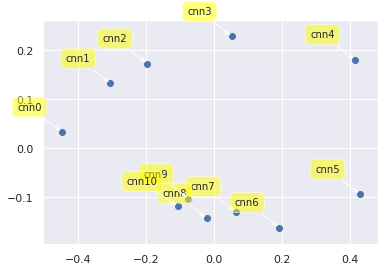

(array([[-0.44896123,  0.03336433],
        [-0.30500489,  0.13234955],
        [-0.19639755,  0.17255598],
        [ 0.05274874,  0.22797461],
        [ 0.41402923,  0.18086919],
        [ 0.42973538, -0.09333287],
        [ 0.19296053, -0.16135586],
        [ 0.06366585, -0.12884003],
        [-0.02120688, -0.14231208],
        [-0.07516112, -0.10280108],
        [-0.10640806, -0.11847173]]),
 ['cnn0',
  'cnn1',
  'cnn2',
  'cnn3',
  'cnn4',
  'cnn5',
  'cnn6',
  'cnn7',
  'cnn8',
  'cnn9',
  'cnn10'])

In [121]:
Mz = []
Lz = []
# for i, ck in enumerate(student_manager.checkpoints):
#     std_ckpt.restore(ck)
#     print("#######", ck, "########", i)
#     student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
#     Mz.append(deepcopy(student_model))
#     Lz.append('ff2cnn'+str(i))
    
for i, ck in enumerate(teacher_manager.checkpoints):
    tchr_ckpt.restore(ck)
    print("#######", ck, "########", i)
    teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(deepcopy(teacher_model))
    Lz.append('cnn'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, cmnist_trans_test, repindex=1)
project2d(reploss_dic, dist_lists)

####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1000/ckpt-1 ######## 0
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1000/ckpt-2 ######## 1
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1000/ckpt-3 ######## 2
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1000/ckpt-4 ######## 3
####### ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_

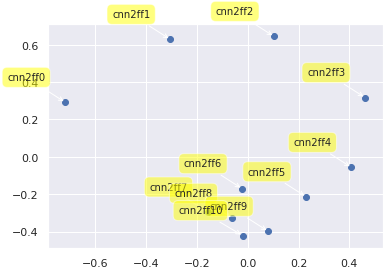

(array([[-0.71828951,  0.29178083],
        [-0.30504822,  0.62879283],
        [ 0.10324347,  0.6448329 ],
        [ 0.46212571,  0.31713245],
        [ 0.40826124, -0.05634212],
        [ 0.22959301, -0.21319022],
        [-0.02216215, -0.17005207],
        [-0.15822845, -0.29479338],
        [-0.060119  , -0.32863087],
        [ 0.08058432, -0.39831502],
        [-0.01996041, -0.42121532]]),
 ['cnn2ff0',
  'cnn2ff1',
  'cnn2ff2',
  'cnn2ff3',
  'cnn2ff4',
  'cnn2ff5',
  'cnn2ff6',
  'cnn2ff7',
  'cnn2ff8',
  'cnn2ff9',
  'cnn2ff10'])

In [129]:
Mz = []
Lz = []
for i, ck in enumerate(student_manager.checkpoints):
    std_ckpt.restore(ck)
    print("#######", ck, "########", i)
    student_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    Mz.append(deepcopy(student_model))
    Lz.append('cnn2ff'+str(i))
    
# for i, ck in enumerate(teacher_manager.checkpoints):
#     tchr_ckpt.restore(ck)
#     print("#######", ck, "########", i)
#     teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
#     Mz.append(deepcopy(teacher_model))
#     Lz.append('cnn'+str(i))
    
reploss_dic, dist_lists = get_reploss_dic(Mz, Lz, cmnist_trans_test, repindex=1)
project2d(reploss_dic, dist_lists)

In [128]:
print(teacher_manager.latest_checkpoint)
for ck in teacher_manager.checkpoints:
    tchr_ckpt.restore(ck)
    #print("#######", ck, "########")
    teacher_model.compile(loss=task.get_loss_fn(), metrics=task.metrics())
    trans = teacher_model.evaluate(cmnist_trans_test, steps=cmnist_trans.info.splits['test'].num_examples / 64, verbose=3)
    scale = teacher_model.evaluate(cmnist_scale_test, steps=cmnist_scale.info.splits['test'].num_examples / 64, verbose=3)
    mnist = teacher_model.evaluate(task.test_dataset, steps=task.n_test_batches, verbose=3)
    print(trans[-1], scale[-1], mnist[-1])

../tf_ckpts/mnist/cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000/ckpt-11
0.1319 0.1018 0.13070914
0.3493 0.2959 0.3951322
0.5206 0.4114 0.60346556
0.747 0.589 0.8477564
0.9037 0.7988 0.95032054
0.9472 0.8715 0.97646236
0.9686 0.9295 0.98717946
0.9753 0.9436 0.9900841
0.9791 0.9529 0.99208736
0.9796 0.9643 0.9932893
0.9816 0.9658 0.9932893


In [126]:
config={'student_exp_name':'gc_o_std1000',
        'teacher_exp_name':'gc_o_dtchr1000',
        'task_name':'mnist',
        'teacher_model':'cl_vcnn',
        'student_model':'cl_vff',
        'teacher_config':'vcnn_mnist7',
        'student_config':'ff_mnist4',
        'distill_config':'pure_dstl2_4_crs_slw_3',
        'distill_mode':'online',
        'chkpt_dir':'../tf_ckpts',
       }

std_hparams=get_model_params(task, config['student_model'], config['student_config'])
tchr_hparams=get_model_params(task, config['teacher_model'], config['teacher_config'])

teacher_model = MODELS[config['teacher_model']](hparams=tchr_hparams, cl_token=cl_token)

   
ckpt_dir = os.path.join(config['chkpt_dir'], task.name,
                              '_'.join([teacher_model.model_name, config['teacher_config'],config['teacher_exp_name']]))
tchr_ckpt = tf.train.Checkpoint(net=teacher_model)
teacher_manager = tf.train.CheckpointManager(tchr_ckpt, ckpt_dir, max_to_keep=None)
teacher_manager.latest_checkpoint

student_model = MODELS[config['student_model']](hparams=std_hparams, cl_token=cl_token)
ckpt_dir = os.path.join(config['chkpt_dir'], task.name,
                          '_'.join([config['distill_mode'],config['distill_config'],
                                    "teacher", teacher_model.model_name, 
                                    config['teacher_config'],
                                    config['teacher_exp_name'],
                                   "student",student_model.model_name,
                                    str(config['student_config']),
                                    config['student_exp_name']]))
print("student_checkpoint:", ckpt_dir)
std_ckpt = tf.train.Checkpoint(net=student_model)
student_manager = tf.train.CheckpointManager(std_ckpt, ckpt_dir, max_to_keep=None)


model config: ff_mnist4
model config: vcnn_mnist7
student_checkpoint: ../tf_ckpts/mnist/online_pure_dstl2_4_crs_slw_3_teacher_cl_vcnn_hc-128.64.64_hfc-_d-3_hdrop-0.3_indrop-0.0_vcnn_mnist7_gc_o_dtchr1000_student_cl_vff_h-512.128.32_d-3_hdrop-0.1_indrop-0.0_ff_mnist4_gc_o_std1000


9984
9984


/home/dehghani/Codes/InDist/notebooks/notebook_utils.py:287: RuntimeWarning: invalid value encountered in true_divide
  y=p_confidence_bins[1:]/total_confidence_bins[1:],


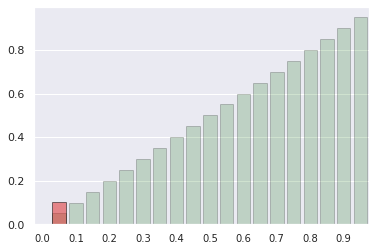

0.17912468


In [116]:
import tensorflow_probability as tfp


model_accuracy, predicted_class_probs, correct_class_probs, model_logits, model_trues= test_for_calibration(teacher_model, task, n_bins=20)

print(len(model_accuracy))
print(len(predicted_class_probs))
plot_calibration(model_accuracy, predicted_class_probs, correct_class_probs, n_bins=20)
plt.show()
model_ece = tfp.stats.expected_calibration_error(
    1000000,
    logits=model_logits,
    labels_true=model_trues,
)
print(model_ece.numpy())

In [ ]:
def test_for_calibration(model, task, n_bins=10):
    preds = []
    correct_class_probs = []
    predicted_class_probs = []
    pred_logits = []
    y_trues = []
    batch_count = task.n_valid_batches
    for x, y in task.valid_dataset:
        logits = model(x)
        pred_logits.extend(logits.numpy())
        pred = tf.argmax(logits, axis=-1)
        
        prob = task.get_probs_fn()(logits, labels=y, temperature=1)
        preds.extend(pred.numpy())
        y_trues.extend(y.numpy())
        batch_indexes = tf.cast(tf.range(len(y), dtype=tf.int32), dtype=tf.int32)
        true_indexes = tf.concat([batch_indexes[:,None], y[:,None]], axis=1)
        pred_indexes = tf.concat([batch_indexes[:,None], tf.cast(pred[:,None], tf.int32)], axis=1)

        correct_class_probs.extend(tf.gather_nd(prob, true_indexes).numpy())
        predicted_class_probs.extend(tf.gather_nd(prob, pred_indexes).numpy())

        batch_count -= 1
        if batch_count == 0:
            break

    model_accuracy = np.asarray(preds) == np.asarray(y_trues)

    return model_accuracy, predicted_class_probs, correct_class_probs, pred_logits, y_trues

def plot_calibration(model_accuracy, predicted_class_probs, correct_class_probs, n_bins=10):
    p_confidence_bins = np.zeros(n_bins+1)
    n_confidence_bins = np.zeros(n_bins+1)
    total_confidence_bins = np.zeros(n_bins+1)
    
    denominator = 100.0 / n_bins
    for i in np.arange(len(model_accuracy)):
        if model_accuracy[i]:
            p_confidence_bins[int(predicted_class_probs[i]*100 / denominator)] += 1.0
        else:
            n_confidence_bins[int(predicted_class_probs[i]*100 / denominator)] -= 1.0
        total_confidence_bins[int(predicted_class_probs[i]*100 / denominator)] += 1

    #sns.stripplot(model_accuracy,predicted_class_probs, color='blue', alpha=0.5, jitter=True)
    #sns.stripplot(model_accuracy,correct_class_probs, color='green', alpha=0.2, jitter=True)
    #sns.swarmplot(model_accuracy,predicted_class_probs, color='blue', alpha=0.5)
    #plt.show()
   
    sns.barplot(x=np.arange(0,n_bins+1)*denominator, 
                y=np.arange(0,n_bins+1)/n_bins, 
                color='green', alpha=0.2, edgecolor='black')
    ax = sns.barplot(x=np.arange(0,n_bins+1)*denominator, 
                    y=p_confidence_bins/total_confidence_bins, 
                    color='red', alpha=0.5, edgecolor='black')
    
    x_ticks = np.arange(0,n_bins,2)
    x_tick_labels = x_ticks / np.float32(n_bins)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels, fontsize=10)
    
def expected_calibration_error(teacher_accuracy, teacher_predicted_class_probs):
    raise NotImplemented